<a href="https://colab.research.google.com/github/blanpa/Streamlit-Cam-Classsifier-food101/blob/main/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-3550dccb-a910-6d4e-2994-264969e48a45)


Tranfer Learning with Tensorflow 


In [2]:
import tensorflow as tf
import tensorflow_hub as tfhub

In [3]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2022-01-16 08:37:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-01-16 08:37:06 (117 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
# Get 100% of the data
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

!tar –xvzf food-101.tar.gz

--2022-01-16 08:37:06--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2022-01-16 08:37:07--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  19.2MB/s    in 4m 5s   

2022-01-16 08:41:13 (19.4 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]

tar: invalid option -- '�'
Try 'tar --help' or 'tar --usage' for more information.


In [5]:
!tar -xvzf food-101.tar.gz

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
food-101/images/cannoli/695879.jpg
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101

In [6]:
!ls

food-101  food-101.tar.gz  helper_functions.py	__pycache__  sample_data


In [7]:
# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

unzip_data("10_food_classes_10_percent.zip")

--2022-01-16 08:42:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   207MB/s    in 0.8s    

2022-01-16 08:42:07 (207 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [8]:
!ls

10_food_classes_10_percent	food-101.tar.gz      __pycache__
10_food_classes_10_percent.zip	helper_functions.py  sample_data
food-101			__MACOSX


In [9]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [10]:
train_dir = "/content/10_food_classes_10_percent/test"
test_dir = "/content/10_food_classes_10_percent/train"

In [11]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10percent = tf.keras.utils.image_dataset_from_directory(
    directory = train_dir,
    image_size = IMG_SIZE,
    label_mode = "categorical",
    batch_size = BATCH_SIZE,

)

test_data_10percent = tf.keras.utils.image_dataset_from_directory(
    directory = test_dir,
    image_size = IMG_SIZE,
    label_mode = "categorical",
    batch_size = BATCH_SIZE,

)

Found 2500 files belonging to 10 classes.
Found 750 files belonging to 10 classes.


In [12]:
data_dir = "/content/food-101/images"
IMG_SIZE = (224, 224) # define image size


train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="categorical",
                                                                 validation_split = 0.3,
                                                                 seed = 42,
                                                                 subset = "training",
                                                                 batch_size=32)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                validation_split = 0.3,
                                                                seed = 42,
                                                                subset = "validation",
                                                                batch_size=32)

Found 101000 files belonging to 101 classes.
Using 70700 files for training.
Found 101000 files belonging to 101 classes.
Using 30300 files for validation.


In [13]:
train_data_10percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [14]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

base_model.trainable = False

inputs =  tf.keras.layers.Input(shape= (224,224,3), name = "input layer")

x = base_model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D(name = "GlobalAveragePooling2D_layer")(x)

outputs = tf.keras.layers.Dense(101, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


16719872/16705208 [==============================] - 0s 0us/step


In [15]:
history_10_percent = model_0.fit(train_data,
                                 epochs=10,
                                 steps_per_epoch=len(train_data),
                                 validation_data=test_data,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=len(test_data), 
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20220116-084218
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


2210/2210 [==============================] - 260s 112ms/step - loss: 1.8466 - accuracy: 0.5520 - val_loss: 1.4285 - val_accuracy: 0.6318
Epoch 2/10
2210/2210 [==============================] - 246s 111ms/step - loss: 1.3209 - accuracy: 0.6580 - val_loss: 1.3224 - val_accuracy: 0.6570
Epoch 3/10
2210/2210 [==============================] - 208s 94ms/step - loss: 1.1784 - accuracy: 0.6897 - val_loss: 1.2861 - val_accuracy: 0.6653
Epoch 4/10
2210/2210 [==============================] - 205s 92ms/step - loss: 1.0859 - accuracy: 0.7140 - val_loss: 1.2678 - val_accuracy: 0.6718
Epoch 5/10
2210/2210 [==============================] - 205s 93ms/step - loss: 1.0210 - accuracy: 0.7286 - val_loss: 1.2622 - val_accuracy: 0.6743
Epoch 6/10
2210/2210 [==============================] - 205s 92ms/step - loss: 0.9687 - accuracy: 0.7416 - val_loss: 1.2639 - val_accuracy: 0.6757
Epoch 7/10
2210/2210 [==============================] - 205s 92ms/step - loss: 0.9262 - accuracy: 0.7509 - val_loss: 1.2674 - v

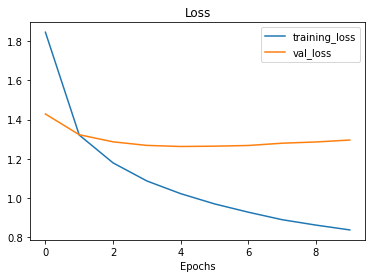

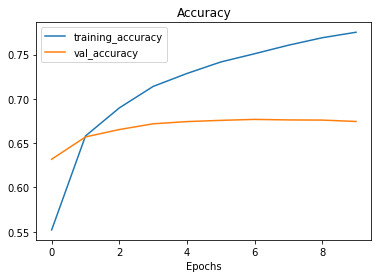

In [16]:
plot_loss_curves(history_10_percent)

In [18]:
model_0.save('model_food101.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [19]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("food-101/images/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['apple_pie' 'baby_back_ribs' 'baklava' 'beef_carpaccio' 'beef_tartare'
 'beet_salad' 'beignets' 'bibimbap' 'bread_pudding' 'breakfast_burrito'
 'bruschetta' 'caesar_salad' 'cannoli' 'caprese_salad' 'carrot_cake'
 'ceviche' 'cheese_plate' 'cheesecake' 'chicken_curry'
 'chicken_quesadilla' 'chicken_wings' 'chocolate_cake' 'chocolate_mousse'
 'churros' 'clam_chowder' 'club_sandwich' 'crab_cakes' 'creme_brulee'
 'croque_madame' 'cup_cakes' 'deviled_eggs' 'donuts' 'dumplings' 'edamame'
 'eggs_benedict' 'escargots' 'falafel' 'filet_mignon' 'fish_and_chips'
 'foie_gras' 'french_fries' 'french_onion_soup' 'french_toast'
 'fried_calamari' 'fried_rice' 'frozen_yogurt' 'garlic_bread' 'gnocchi'
 'greek_salad' 'grilled_cheese_sandwich' 'grilled_salmon' 'guacamole'
 'gyoza' 'hamburger' 'hot_and_sour_soup' 'hot_dog' 'huevos_rancheros'
 'hummus' 'ice_cream' 'lasagna' 'lobster_bisque' 'lobster_roll_sandwich'
 'macaroni_and_cheese' 'macarons' 'miso_soup' 'mussels' 'nachos'
 'omelette' 'onion_rings' 'oy

In [20]:
class_names

array(['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio',
       'beef_tartare', 'beet_salad', 'beignets', 'bibimbap',
       'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad',
       'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche',
       'cheese_plate', 'cheesecake', 'chicken_curry',
       'chicken_quesadilla', 'chicken_wings', 'chocolate_cake',
       'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich',
       'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes',
       'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict',
       'escargots', 'falafel', 'filet_mignon', 'fish_and_chips',
       'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast',
       'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread',
       'gnocchi', 'greek_salad', 'grilled_cheese_sandwich',
       'grilled_salmon', 'guacamole', 'gyoza', 'hamburger',
       'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus',
       

In [32]:
class_names = class_names.tolist()
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [34]:
with open("class_names.txt", 'w') as file:
        for row in class_names:
            s = " ".join(map(str, row))
            file.write(s+'\n')